In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.python.client import device_lib
import numpy as np
import pandas as pd
import opendatasets as od
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5



In [3]:
od.download('https://www.kaggle.com/arpitjain007/game-of-deep-learning-ship-datasets')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dikshantkalotra
Your Kaggle Key: ········


  0%|                                                                                      | 0.00/80.9M [00:00<?, ?B/s]

100%|█████████████████████████████████████████████████████████████████████████████| 80.9M/80.9M [00:10<00:00, 8.26MB/s]


In [46]:
data_dir = './game-of-deep-learning-ship-datasets'
os.listdir(data_dir)

['test_ApKoW4T.csv', 'train', 'sample_submission_ns2btKE.csv']

In [47]:
img_df = pd.read_csv(data_dir + '/train/train.csv')
img_df.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [48]:
len(img_df)

6252

In [49]:
img_df['category'] = img_df['category'] - 1

In [50]:
img_df.category.value_counts()

0    2120
4    1217
1    1167
2     916
3     832
Name: category, dtype: int64

In [51]:
images = []
categories = []

path = data_dir + '/train/images'
img_shape = 128

for row in img_df.iterrows():
  img_path = os.path.join(path, row[1]['image'])
  img = keras.preprocessing.image.load_img(img_path, target_size = (img_shape, img_shape), interpolation='lanczos')
  img = keras.preprocessing.image.img_to_array(img)
  images.append(img)
  categories.append(float(row[1]['category']))

images = np.asarray(images)
categories = np.asarray(categories)

In [52]:
convert_labels = {0: 'Cargo', 1:'Military', 2:'Carrier', 3:'Cruise', 4:'Tankers'}

In [53]:
images = images / 255.0

In [54]:
def show_image(img, label):
  plt.imshow(img)
  plt.title(label)
  plt.axis('off')

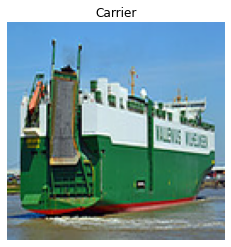

In [55]:
show_image(images[23], convert_labels[categories[23]])

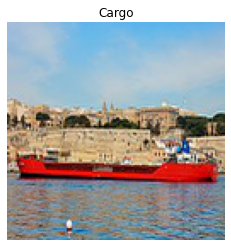

In [56]:
show_image(images[49], convert_labels[categories[49]])

In [ ]:
model = keras.models.Sequential([
              keras.layers.Input((img_shape, img_shape, 3)),
              keras.applications.MobileNet(include_top=False, weights='imagenet'),
              keras.layers.Conv2D(3, 3, padding='same', activation='sigmoid'),
              keras.layers.Flatten(),
              keras.layers.Dense(5, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(0.0001), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, None, None, 1024)  3228864   
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 3)           27651     
_________________________________________________________________
flatten_1 (Flatten)          (None, 48)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 245       
Total params: 3,256,760
Trainable params: 3,234,872
Non-trainable params: 21,888
_________________________________________________________________


In [ ]:
model.fit(images, categories, epochs=10, batch_size=128, validation_split=0.2, shuffle=True)

Epoch 1/10
40/40 [==============================] - 19s 415ms/step - loss: 1.1385 - accuracy: 0.5977 - val_loss: 0.9530 - val_accuracy: 0.6563
Epoch 2/10
40/40 [==============================] - 16s 401ms/step - loss: 0.6306 - accuracy: 0.8832 - val_loss: 0.7352 - val_accuracy: 0.7570
Epoch 3/10
40/40 [==============================] - 16s 399ms/step - loss: 0.4332 - accuracy: 0.9458 - val_loss: 0.5695 - val_accuracy: 0.8313
Epoch 4/10
40/40 [==============================] - 16s 400ms/step - loss: 0.3198 - accuracy: 0.9732 - val_loss: 0.5051 - val_accuracy: 0.8441
Epoch 5/10
40/40 [==============================] - 16s 397ms/step - loss: 0.2458 - accuracy: 0.9876 - val_loss: 0.4539 - val_accuracy: 0.8585
Epoch 6/10
40/40 [==============================] - 16s 399ms/step - loss: 0.1918 - accuracy: 0.9948 - val_loss: 0.4069 - val_accuracy: 0.8665
Epoch 7/10
40/40 [==============================] - 16s 395ms/step - loss: 0.1576 - accuracy: 0.9976 - val_loss: 0.3822 - val_accuracy: 0.8777

In [ ]:
model.evaluate(images, categories)

196/196 [==============================] - 7s 32ms/step - loss: 0.1416 - accuracy: 0.9797


[0.14161811769008636, 0.9796864986419678]

In [43]:
pred_arr = np.random.randint(0, 6251, 25)

In [44]:
pred_arr

array([2091, 4044, 4357, 1631, 1443, 1300, 3529, 5674, 6171, 4674, 6098,
         19, 4014,  772, 2183, 4015, 3682, 3215, 2784, 4816, 1707,  556,
       3913, 2841,  836])

In [119]:
def predict_images(model):
  plt.figure(figsize=(20,20))
  for n in range(25):
    img = images[pred_arr[n]]
    label = categories[pred_arr[n]]
    plt.imshow(img)
    ax = plt.subplot(5, 5, n+1)
    pred = model.predict(img.reshape(1,128,128,3))
    pred_label = int(np.where(pred == np.max(pred))[1])
    title = 'Label: ' + convert_labels[label] + '   Predicted: ' + convert_labels[pred_label]
    plt.title(title)
    plt.axis('off')

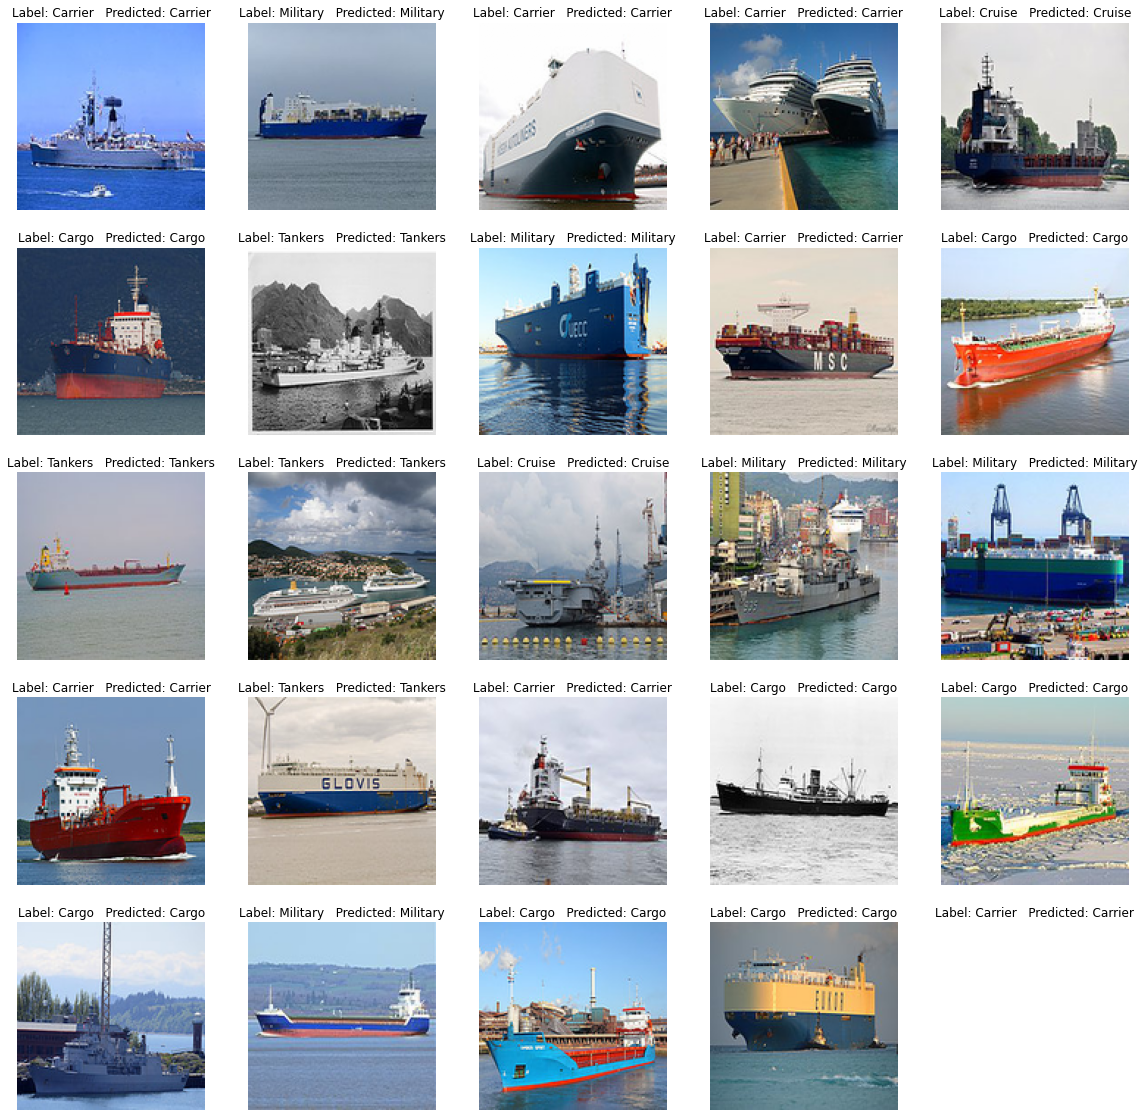

In [120]:
predict_images(model)

# Testing on Another dataset

In [122]:
test_df = pd.read_csv(data_dir + '/test_ApKoW4T.csv')

In [123]:
test_df.head()

,image
0,1007700.jpg
1,1011369.jpg
2,1051155.jpg
3,1062001.jpg
4,1069397.jpg


In [136]:
test_images = []

for image in test_df.iterrows():
  t_img_path = os.path.join(path, image[1]['image'])
  t_img = keras.preprocessing.image.load_img(t_img_path, target_size=(img_shape, img_shape), interpolation='lanczos')
  t_img = keras.preprocessing.image.img_to_array(t_img)
  test_images.append(t_img)

test_images = np.asarray(test_images)
test_images = test_images / 255.0

In [184]:
def test_prediction(image):
  plt.imshow(image)
  pred = model.predict(image.reshape(1,128,128,3)).reshape(5).tolist()
  print(convert_labels[0],'->',round(pred[0]*100, 2),'%\n',convert_labels[1],'->',round(pred[1]*100,2),'%\n',convert_labels[2],'->',round(pred[2]*100,2),'%\n',convert_labels[3],'->',round(pred[3]*100,2),'%\n',convert_labels[4],'->',round(pred[4]*100,2))


Cargo -> 1.71 %
 Military -> 3.92 %
 Carrier -> 3.0 %
 Cruise -> 88.63 %
 Tankers -> 2.74


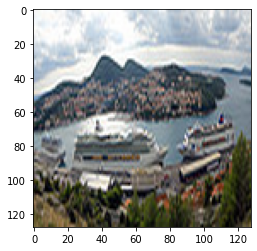

In [185]:
test_prediction(test_images[0])

Cargo -> 3.1 %
 Military -> 2.42 %
 Carrier -> 8.27 %
 Cruise -> 84.33 %
 Tankers -> 1.88


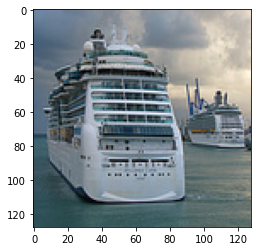

In [191]:
test_prediction(test_images[10])

Cargo -> 4.84 %
 Military -> 3.79 %
 Carrier -> 3.83 %
 Cruise -> 86.51 %
 Tankers -> 1.03


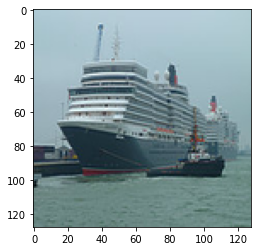

In [192]:
test_prediction(test_images[95])

Cargo -> 13.72 %
 Military -> 80.86 %
 Carrier -> 0.9 %
 Cruise -> 1.59 %
 Tankers -> 2.94


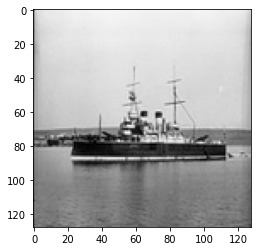

In [193]:
test_prediction(test_images[15])

Cargo -> 1.21 %
 Military -> 4.12 %
 Carrier -> 1.71 %
 Cruise -> 91.61 %
 Tankers -> 1.34


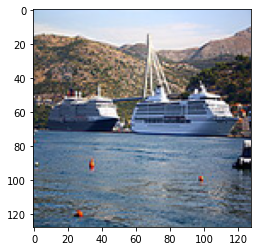

In [201]:
test_prediction(test_images[111])